<a href="https://colab.research.google.com/github/annaouyang/open-hacks-2020/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis 

This notebook aims to understand the relationship mobility and coronavirus casecounts.

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

In [5]:
col = ['county', 'state', 'fips','population', 'date', 'day_of_week',
       'retail_and_rec', 'grocery_and_pharmacy', 'parks', 'transit_stations',
       'workplaces', 'residential','total_cases', 'new_cases']

dtypes = [str, str, str, float, str, str, float, float, float, float, float, float, float, float]

dtype_dict = dict(zip(col, dtypes))

df = pd.read_csv('https://raw.githubusercontent.com/annaouyang/open-hacks-2020/master/mobility_and_case_count.csv', dtype=dtype_dict)

# change date to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,county,state,fips,population,date,day_of_week,retail_and_rec,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,total_cases,new_cases
0,Autauga County,Alabama,01001,55869.0,2020-02-15,5,5.0,7.0,NaN,NaN,-4.0,NaN,0.0,0.0
1,Autauga County,Alabama,01001,55869.0,2020-02-16,6,0.0,1.0,-23.0,NaN,-4.0,NaN,0.0,0.0
2,Autauga County,Alabama,01001,55869.0,2020-02-17,0,8.0,0.0,NaN,NaN,-27.0,5.0,0.0,0.0
3,Autauga County,Alabama,01001,55869.0,2020-02-18,1,-2.0,0.0,NaN,NaN,2.0,0.0,0.0,0.0
4,Autauga County,Alabama,01001,55869.0,2020-02-19,2,-2.0,0.0,NaN,NaN,2.0,0.0,0.0,0.0


In [6]:
df.dtypes

county                          object
state                           object
fips                            object
population                     float64
date                    datetime64[ns]
day_of_week                     object
retail_and_rec                 float64
grocery_and_pharmacy           float64
parks                          float64
transit_stations               float64
workplaces                     float64
residential                    float64
total_cases                    float64
new_cases                      float64
dtype: object

## Correlational Heatmap

[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'retail_and_rec'),
 Text(2.5, 0, 'grocery_and_pharmacy'),
 Text(3.5, 0, 'parks'),
 Text(4.5, 0, 'transit_stations'),
 Text(5.5, 0, 'workplaces'),
 Text(6.5, 0, 'residential'),
 Text(7.5, 0, 'total_cases'),
 Text(8.5, 0, 'new_cases')]

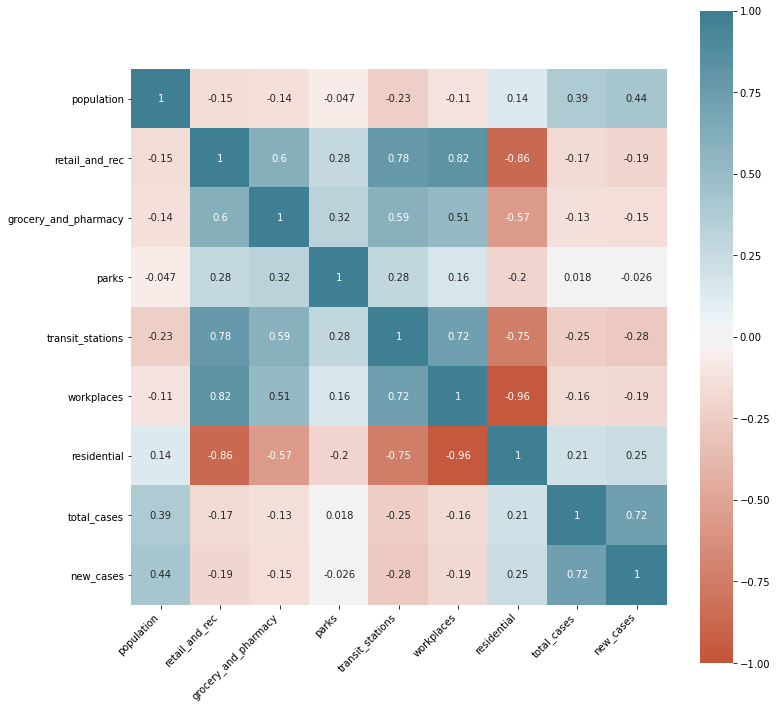

In [10]:
# calculate the correlation matrix
import seaborn as sns 
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'retail_and_rec'),
 Text(2.5, 0, 'grocery_and_pharmacy'),
 Text(3.5, 0, 'parks'),
 Text(4.5, 0, 'transit_stations'),
 Text(5.5, 0, 'workplaces'),
 Text(6.5, 0, 'residential'),
 Text(7.5, 0, 'total_cases'),
 Text(8.5, 0, 'new_cases')]

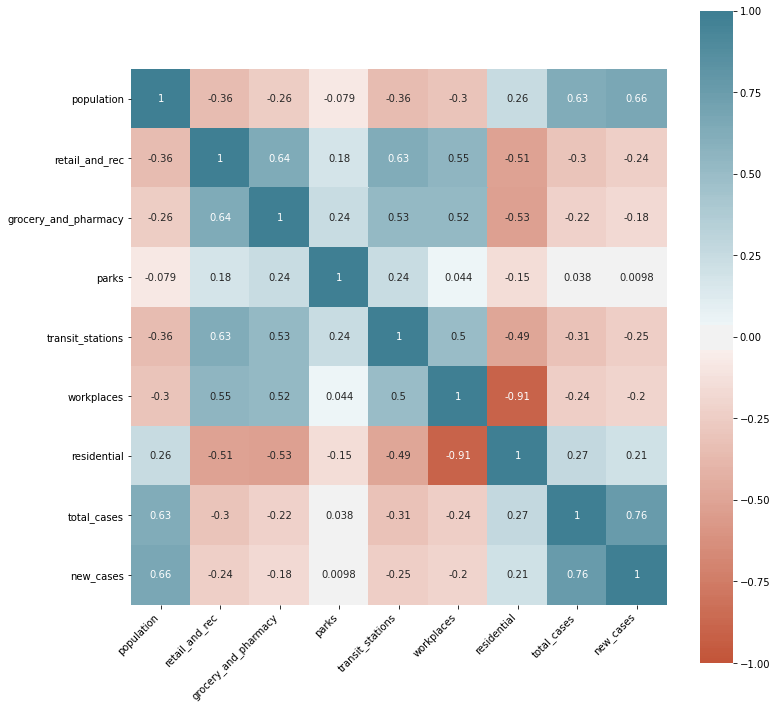

In [11]:
# since states have reopened

subset = df.loc[df['date'] >= dt.datetime(2020, 5, 1)]

plt.figure(figsize=(12, 12))
corr = subset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### Conclusion

Don't see the results we were hoping more (increased mobility = increase in case counts) ... but this is probably due to the fact that mobility (as measured against baseline in Jan.) during the pandemic was dramatically decreased overall.